# Hands-On Pertemuan 9: Spark SQL

## Tujuan:
- Mengasah keterampilan analisis data menggunakan Spark SQL.
- Melakukan lebih banyak latihan SQL yang mengarah ke skenario dunia nyata.
- Mempersiapkan mahasiswa untuk menggunakan Spark SQL dalam proyek besar.


### 1. Refresher: Basic SQL Operations in Spark SQL
- **Tugas 1**: Ulangi pemahaman Anda tentang SQL dasar dengan menjalankan queries sederhana pada dataset di Spark SQL.


In [ ]:
pip install pyspark==3.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285391 sha256=d4ba684550026fe4249d5504acc3110b14cbf2d073d92337d18274fcb54f40d3
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.5.3
    Uninstalling pyspark-3.5.3:
      Successfully uninstalled pyspark-3.5.3


In [ ]:
pip install pandas

In [ ]:
pip install findspark

In [ ]:
pip install matplotlib

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

In [ ]:
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()


+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



### 2. Advanced Queries for Data Analysis
Gunakan queries lebih kompleks, melibatkan grouping, filtering, dan subqueries.
- **Tugas 2**: Buat SQL query yang menghitung total gaji berdasarkan jenis kelamin dan usia.


In [ ]:
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()


+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



- **Tugas Tambahan 2**:
1. Cari rata-rata gaji per departemen.
2. Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.
3. Buat ranking karyawan berdasarkan gaji dalam departemen mereka.


In [ ]:
# Tugas Tambahan 2:
# 1. Cari rata-rata gaji per departemen.
spark.sql('''
SELECT AVG(Salary) as AverageSalary, DeptId FROM employees GROUP BY DeptId
''').show()

+-------------+------+
|AverageSalary|DeptId|
+-------------+------+
|       2850.0|     1|
|       4100.0|     2|
+-------------+------+



In [ ]:
# Tugas Tambahan 2:
# 2. Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.
spark.sql('''
WITH EmployeeWithAvg AS (
    SELECT Name, Salary, Gender, AVG(Salary) OVER() as AverageSalary
    FROM employees
    WHERE Gender = 'M'
)
SELECT Name, Salary, Gender, AverageSalary
FROM EmployeeWithAvg
WHERE Salary > AverageSalary
''').show()
spark.sql('''
WITH EmployeeWithAvg AS (
    SELECT Name, Salary, Gender, AVG(Salary) OVER() as AverageSalary
    FROM employees
    WHERE Gender = 'F'
)
SELECT Name, Salary, Gender, AverageSalary
FROM EmployeeWithAvg
WHERE Salary > AverageSalary
''').show()


+-----+------+------+-------------+
| Name|Salary|Gender|AverageSalary|
+-----+------+------+-------------+
|James|  3000|     M|       2850.0|
+-----+------+------+-------------+

+----+------+------+-------------+
|Name|Salary|Gender|AverageSalary|
+----+------+------+-------------+
+----+------+------+-------------+



In [ ]:
# Tugas Tambahan 2:
# 3. Buat ranking karyawan berdasarkan gaji dalam departemen mereka.
spark.sql('''
SELECT Name, Age, Gender, Salary, DeptId, DENSE_RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS SalaryRank
FROM employees
''').show()


+-----+---+------+------+------+----------+
| Name|Age|Gender|Salary|DeptId|SalaryRank|
+-----+---+------+------+------+----------+
|James| 34|     M|  3000|     1|         1|
|  Lee| 23|     M|  2700|     1|         2|
| Anna| 28|     F|  4100|     2|         1|
+-----+---+------+------+------+----------+



### 3. Penggunaan Window Functions dan Subqueries
Latihan penggunaan window functions untuk menemukan karyawan dengan gaji tertinggi dan urutannya berdasarkan kelompok usia.
- **Tugas 3**: Terapkan window functions untuk menemukan top 3 karyawan dalam kelompok usia tertentu.


In [ ]:
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()


+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



### 4. Advanced Spark SQL Queries
Menjelajahi queries yang lebih kompleks yang melibatkan multiple joins, subqueries, dan window functions.
- **Tugas 4**: Demonstrasi penggunaan multi-level joins dan subqueries untuk analisis data yang mendalam.


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()


+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



Latihan mandiri untuk memperkuat pemahaman tentang Spark SQL dalam analisis data terdistribusi.
- **Tugas 5**: Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.
- **Tugas 6**: Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.


In [ ]:
# Tugas 5
# Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.
spark.sql('''
SELECT AVG(e.Salary) as AverageSalary, d.DeptId FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptId
''').show()
spark.sql('''
SELECT e.Name, e.Age, e.Salary, d.DeptId, ROW_NUMBER() OVER (PARTITION BY d.DeptName ORDER BY e.Salary DESC) as rank
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
''').show()

+-------------+------+
|AverageSalary|DeptId|
+-------------+------+
|       2850.0|     1|
|       4100.0|     2|
+-------------+------+

+-----+---+------+------+----+
| Name|Age|Salary|DeptId|rank|
+-----+---+------+------+----+
|James| 34|  3000|     1|   1|
|  Lee| 23|  2700|     1|   2|
| Anna| 28|  4100|     2|   1|
+-----+---+------+------+----+



In [ ]:
# Tugas 6
# Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.
spark.sql('''
SELECT e.Age, d.DeptId, AVG(e.Salary) AS AverageSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY e.Age, d.DeptId
ORDER BY d.DeptId, e.Age
''').show()

+---+------+-------------+
|Age|DeptId|AverageSalary|
+---+------+-------------+
| 23|     1|       2700.0|
| 34|     1|       3000.0|
| 28|     2|       4100.0|
+---+------+-------------+



### 5. Advanced Data Analysis and Visualization
Penerapan teknik analisis data yang lebih canggih dan visualisasi menggunakan PySpark dan matplotlib.
- **Tugas 7**: Lakukan analisis tren gaji menggunakan Spark SQL dan visualisasikan hasilnya.


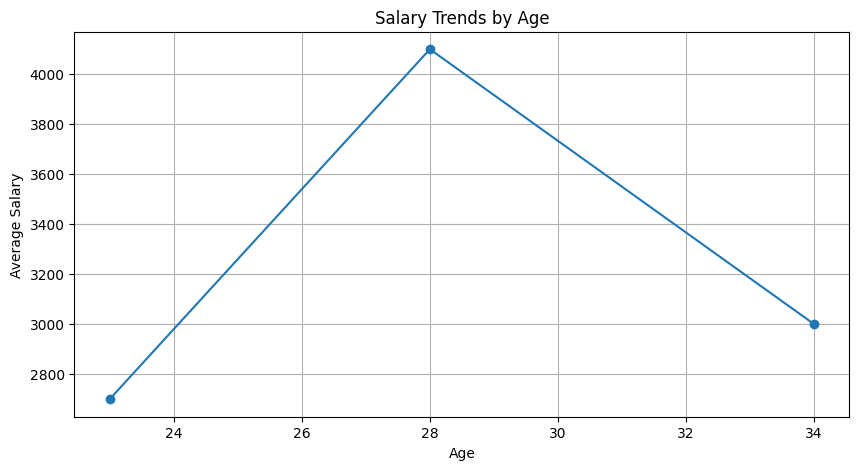

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()


### 6. Homework
- **Tugas 1**: Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.
- **Tugas 2**: Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart.
- **Tugas 3**: Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti `SUM()`, `AVG()`, `COUNT()`, serta `JOIN` antar tabel serta buat visualisasi yang menarik.


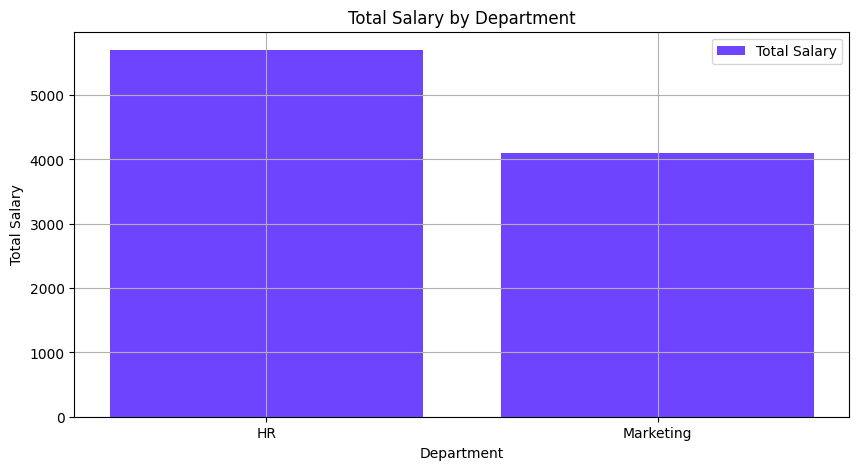

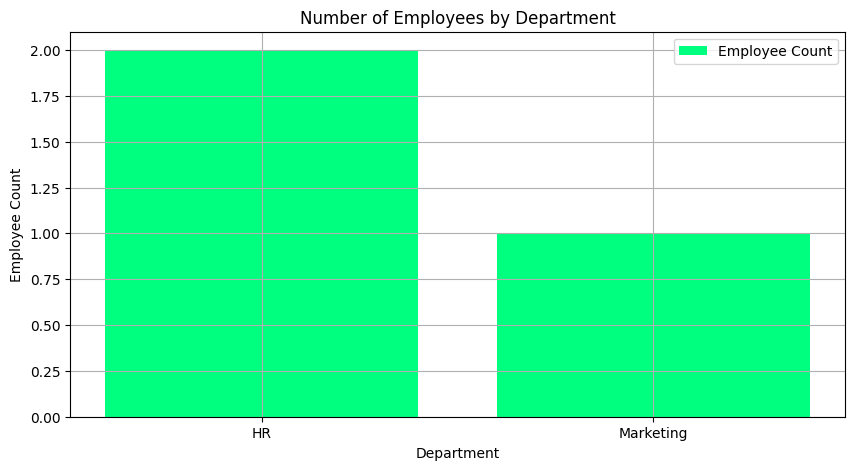

In [ ]:
# Tugas 1: Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.
salary_count_by_dept = spark.sql('''
SELECT d.DeptName, SUM(e.Salary) AS TotalSalary, COUNT(e.Name) AS EmployeeCount
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
''').toPandas()

plt.figure(figsize=(10, 5))
plt.bar(salary_count_by_dept['DeptName'], salary_count_by_dept['TotalSalary'], color='#6e44ff', label='Total Salary')
plt.xlabel('Department')
plt.ylabel('Total Salary')
plt.title('Total Salary by Department')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(salary_count_by_dept['DeptName'], salary_count_by_dept['EmployeeCount'], color='#00ff7f', label='Employee Count')
plt.xlabel('Department')
plt.ylabel('Employee Count')
plt.title('Number of Employees by Department')
plt.legend()
plt.grid(True)
plt.show()


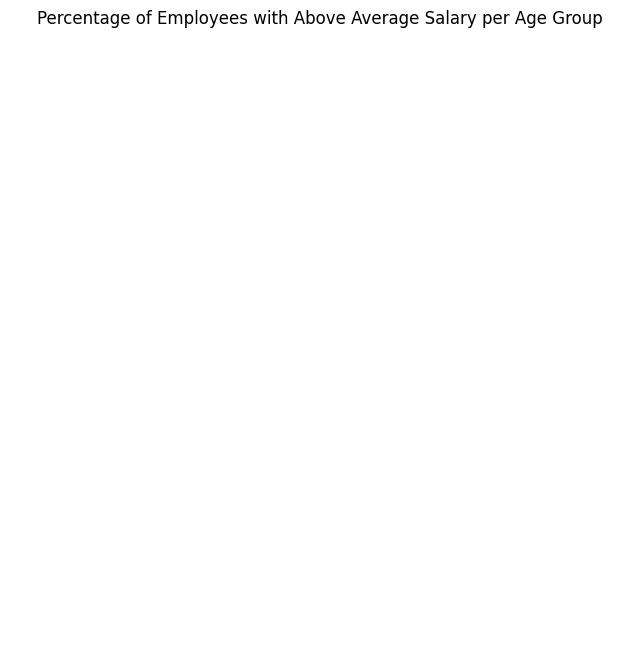

In [ ]:
# Tugas 2: Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart.
above_avg_salary_count = spark.sql('''
WITH AgeAverage AS (
    SELECT Age, AVG(Salary) AS AvgSalary
    FROM employees
    GROUP BY Age
)
SELECT a.Age, COUNT(e.Name) AS AboveAvgCount
FROM employees e
JOIN AgeAverage a ON e.Age = a.Age
WHERE e.Salary > a.AvgSalary
GROUP BY a.Age
''').toPandas()

plt.figure(figsize=(8, 8))
plt.pie(above_avg_salary_count['AboveAvgCount'], labels=above_avg_salary_count['Age'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Employees with Above Average Salary per Age Group')
plt.axis('equal')
plt.show()


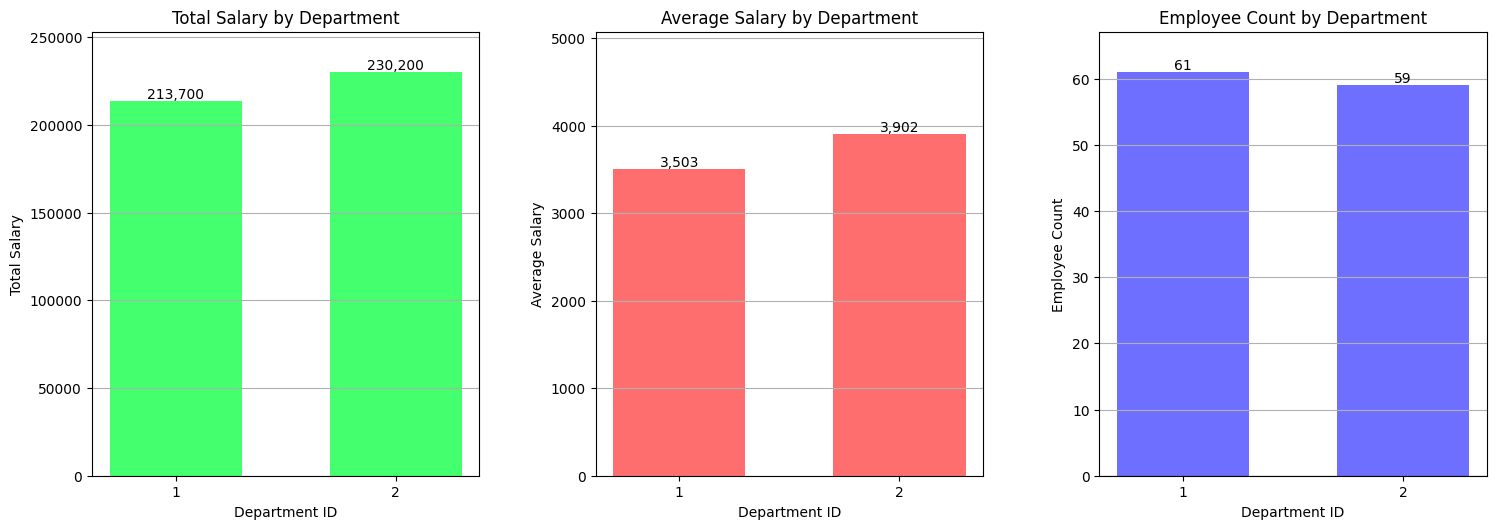

In [ ]:
# Tugas 3: Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti SUM(), AVG(), COUNT(), serta JOIN antar tabel serta buat visualisasi yang menarik.
large_data = [
    ('James', 34, 'M', 3000, 1), ('Anna', 28, 'F', 4100, 2), ('Lee', 23, 'M', 2700, 1), ('Mark', 30, 'M', 5000, 1),
    ('Sophia', 26, 'F', 3800, 2), ('Chris', 29, 'M', 3200, 1), ('John', 25, 'M', 2600, 1), ('Emily', 31, 'F', 4500, 2),
    ('Robert', 35, 'M', 3400, 1), ('Laura', 27, 'F', 4000, 2), ('Tom', 22, 'M', 2800, 1), ('Jessica', 32, 'F', 4300, 2),
    ('Alex', 24, 'M', 2900, 1), ('Kate', 29, 'F', 3900, 2), ('Luke', 33, 'M', 3100, 1), ('Sara', 27, 'F', 3700, 2),
    ('Peter', 36, 'M', 3500, 1), ('Olivia', 26, 'F', 3600, 2), ('David', 31, 'M', 3300, 1), ('Emma', 24, 'F', 4200, 2),
    ('Michael', 35, 'M', 4100, 1), ('Mia', 30, 'F', 3800, 2), ('Daniel', 28, 'M', 3000, 1), ('Zoe', 33, 'F', 4400, 2),
    ('Ethan', 25, 'M', 2700, 1), ('Chloe', 34, 'F', 4000, 2), ('Max', 29, 'M', 5000, 1), ('Sophia', 32, 'F', 3900, 2),
    ('William', 24, 'M', 2800, 1), ('Ava', 35, 'F', 3500, 2), ('Henry', 26, 'M', 3600, 1), ('Lily', 31, 'F', 3700, 2),
    ('Jackson', 23, 'M', 2900, 1), ('Grace', 29, 'F', 3400, 2), ('Oliver', 27, 'M', 3100, 1), ('Isabella', 30, 'F', 3200, 2),
    ('Jacob', 22, 'M', 2600, 1), ('Ella', 28, 'F', 4200, 2), ('Mason', 33, 'M', 3700, 1), ('Emily', 27, 'F', 4100, 2),
    ('Benjamin', 31, 'M', 3200, 1), ('Amelia', 34, 'F', 4300, 2), ('Lucas', 36, 'M', 3400, 1), ('Sophie', 32, 'F', 3500, 2),
    ('Jack', 29, 'M', 3800, 1), ('Harper', 28, 'F', 3600, 2), ('Charlie', 30, 'M', 3100, 1), ('Avery', 25, 'F', 3900, 2),
    ('Liam', 33, 'M', 2800, 1), ('Ella', 29, 'F', 4000, 2), ('Sebastian', 31, 'M', 4500, 1), ('Aria', 26, 'F', 4200, 2),
    ('Owen', 24, 'M', 2600, 1), ('Scarlett', 34, 'F', 3800, 2), ('Nathan', 35, 'M', 4400, 1), ('Victoria', 32, 'F', 3700, 2),
    ('Dylan', 27, 'M', 3300, 1), ('Riley', 30, 'F', 4100, 2), ('Leo', 29, 'M', 3500, 1), ('Hazel', 28, 'F', 3600, 2),
    ('Gabriel', 25, 'M', 3900, 1), ('Nora', 33, 'F', 4200, 2), ('Eli', 31, 'M', 3000, 1), ('Camila', 29, 'F', 3700, 2),
    ('Isaac', 23, 'M', 3100, 1), ('Violet', 27, 'F', 3500, 2), ('Ryan', 36, 'M', 4000, 1), ('Aurora', 31, 'F', 3900, 2),
    ('Luke', 35, 'M', 4500, 1), ('Isla', 30, 'F', 3700, 2), ('Wyatt', 34, 'M', 3200, 1), ('Madison', 29, 'F', 3800, 2),
    ('Julian', 28, 'M', 4100, 1), ('Penelope', 32, 'F', 3900, 2), ('Hudson', 25, 'M', 3400, 1), ('Stella', 27, 'F', 3600, 2),
    ('Carter', 29, 'M', 3900, 1), ('Hannah', 34, 'F', 4200, 2), ('Hunter', 30, 'M', 3500, 1), ('Layla', 28, 'F', 4000, 2),
    ('Connor', 26, 'M', 3700, 1), ('Ellie', 31, 'F', 3600, 2), ('Asher', 33, 'M', 3000, 1), ('Lila', 27, 'F', 3800, 2),
    ('Samuel', 24, 'M', 2700, 1), ('Brooklyn', 29, 'F', 4000, 2), ('Ezra', 32, 'M', 4500, 1), ('Claire', 26, 'F', 4300, 2),
    ('Miles', 35, 'M', 3800, 1), ('Luna', 30, 'F', 3700, 2), ('Adam', 31, 'M', 4100, 1), ('Zoey', 28, 'F', 4000, 2),
    ('Declan', 25, 'M', 3500, 1), ('Savannah', 34, 'F', 3900, 2), ('Nolan', 29, 'M', 3700, 1), ('Eliana', 27, 'F', 3800, 2),
    ('Finn', 34, 'M', 4000, 1), ('Naomi', 27, 'F', 4200, 2), ('Noah', 28, 'M', 3900, 1), ('Evelyn', 33, 'F', 3800, 2),
    ('Jason', 29, 'M', 3500, 1), ('Samantha', 32, 'F', 3700, 2), ('Logan', 26, 'M', 3600, 1), ('Maya', 30, 'F', 4000, 2),
    ('Theo', 25, 'M', 3300, 1), ('Eva', 31, 'F', 3900, 2), ('Jayden', 34, 'M', 4500, 1), ('Alice', 28, 'F', 4300, 2),
    ('Zachary', 36, 'M', 3200, 1), ('Lydia', 29, 'F', 3700, 2), ('Blake', 33, 'M', 4100, 1), ('Clara', 27, 'F', 4000, 2),
    ('Tyler', 24, 'M', 3400, 1), ('Ivy', 30, 'F', 4200, 2), ('Caleb', 32, 'M', 3500, 1), ('Mila', 34, 'F', 3800, 2),
    ('Andrew', 35, 'M', 3900, 1), ('Lilly', 26, 'F', 4100, 2), ('Elliott', 31, 'M', 3600, 1), ('Daisy', 28, 'F', 3900, 2)
]

columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
large_df = spark.createDataFrame(large_data, schema=columns)
large_df.createOrReplaceTempView('employees')

salary_analysis = spark.sql('''
SELECT DeptId, SUM(Salary) AS TotalSalary, AVG(Salary) AS AverageSalary, COUNT(Name) AS EmployeeCount
FROM employees
GROUP BY DeptId
''').toPandas()

import numpy as np
x = np.arange(len(salary_analysis['DeptId']))
bar_width = 0.6

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

ax1.bar(x, salary_analysis['TotalSalary'], width=bar_width, color='#44ff6e')
ax1.set_xlabel('Department ID')
ax1.set_ylabel('Total Salary')
ax1.set_title('Total Salary by Department')
ax1.set_xticks(x)
ax1.set_xticklabels(salary_analysis['DeptId'])

ax1.set_ylim(0, salary_analysis['TotalSalary'].max() * 1.1)
ax1.set_yticks(np.arange(0, salary_analysis['TotalSalary'].max() * 1.1, 50000))
ax1.grid(axis='y')

for i in range(len(salary_analysis)):
    ax1.text(i, salary_analysis['TotalSalary'][i],
             f"{salary_analysis['TotalSalary'][i]:,.0f}",
             ha='center', va='bottom', color='black')

ax2.bar(x, salary_analysis['AverageSalary'], width=bar_width, color='#ff6e6e')
ax2.set_xlabel('Department ID')
ax2.set_ylabel('Average Salary')
ax2.set_title('Average Salary by Department')
ax2.set_xticks(x)
ax2.set_xticklabels(salary_analysis['DeptId'])

ax2.set_ylim(0, salary_analysis['AverageSalary'].max() * 1.3)
ax2.set_yticks(np.arange(0, salary_analysis['AverageSalary'].max() * 1.3, 1000))
ax2.grid(axis='y')

for i in range(len(salary_analysis)):
    ax2.text(i, salary_analysis['AverageSalary'][i],
             f"{salary_analysis['AverageSalary'][i]:,.0f}",
             ha='center', va='bottom', color='black')

ax3.bar(x, salary_analysis['EmployeeCount'], width=bar_width, color='#6e6eff')
ax3.set_xlabel('Department ID')
ax3.set_ylabel('Employee Count')
ax3.set_title('Employee Count by Department')
ax3.set_xticks(x)
ax3.set_xticklabels(salary_analysis['DeptId'])

ax3.set_ylim(0, salary_analysis['EmployeeCount'].max() * 1.1)
ax3.set_yticks(np.arange(0, salary_analysis['EmployeeCount'].max() * 1.1, 10))
ax3.grid(axis='y')

for i in range(len(salary_analysis)):
    ax3.text(i, salary_analysis['EmployeeCount'][i],
             f"{salary_analysis['EmployeeCount'][i]:,.0f}",
             ha='center', va='bottom', color='black')

plt.subplots_adjust(wspace=0.3, top=0.85)
plt.axhline(0, color='black', linewidth=0.8)
plt.show()